In [16]:
# imports
import sys
import math
import networkx as nx
import matplotlib.pyplot as plt

### Reprezentacja

In [34]:
G = nx.Graph()

x1=0
x2=1
y1=0
y2=1
z1=0
z2=1

#           id   ,typ,      nazwa,     x,    y,    z
G.add_node("v1", type='v', name='v1', x=x1, y=y1, z=z1)
G.add_node("v2", type='v', name='v2', x=x2, y=x2, z=z2)
G.add_edge("v2", "v1")

v1 = G.nodes["v1"]
v2 = G.nodes["v2"]
attrs = {(v1['name'], v2['name']): {'b': True, 'l': 20}}
nx.set_edge_attributes(G, attrs)

In [36]:
G[v1['name']][v2['name']]['b']

True

In [22]:
def draw_graph(G):
    types = nx.get_node_attributes(G, 'type')
    xs = nx.get_node_attributes(G, 'x')
    ys = nx.get_node_attributes(G, 'y')
    zs = nx.get_node_attributes(G, 'z')
    bs = nx.get_node_attributes(G, 'b')
    ls = nx.get_node_attributes(G, 'l')
    rs = nx.get_node_attributes(G, 'r')
    
    nx.draw(G)

In [3]:
def create_graph_P1(x1, x2, x3, x4, y1, y2, y3, y4, z1, z2, z3, z4, r1, b1, b2, b3, b4, l1, l2, l3, l4):
    G = nx.Graph()
    
    G.add_node("v1", type='v', x=x1, y=y1, z=z1)
    G.add_node("v2", type='v', x=x2, y=y2, z=z2)
    G.add_node("v3", type='v', x=x3, y=y3, z=z3)
    G.add_node("e1", type='e', b=b1, l=l1)
    G.add_node("e2", type='e', b=b2, l=l2)
    G.add_node("e3", type='e', b=b3, l=l3)
    G.add_node("i1", type='i', r=r1)

    G.add_edge("i1", "v1")
    G.add_edge("i1", "v2")
    G.add_edge("i1", "v3")
    
    G.add_edge("e1", "v1")
    G.add_edge("e1", "v2")
    
    G.add_edge("e2", "v2")
    G.add_edge("e2", "v3")
    
    G.add_edge("e3", "v1")
    G.add_edge("e3", "v3")
    
    return G

In [37]:
def check_type_P1(G: nx.Graph) -> bool:
    r1 = G.nodes["i1"]['r']
    b1 = G.nodes["e1"]['b']
    l1 = G.nodes["e1"]['l']
    l2 = G.nodes["e2"]['l']
    l3 = G.nodes["e3"]['l']
    
    return r1 and b1 and l1 >= l2 and l1 >= l3 

In [38]:
from typing import Optional
def transform_P1(G: nx.Graph) -> Optional[nx.Graph]:
    if not check_type_P1(G):
        return None
    
    x3 = G.nodes["v3"]['x']
    y3 = G.nodes["v3"]['y']
    z3 = G.nodes["v3"]['z']
    
    l4 = G.nodes["e1"]['l'] / 2
    b4 = G.nodes["e1"]['b']
    l5 = G.nodes["e1"]['l'] / 2
    b5 = G.nodes["e1"]['b']
    x4 = (G.nodes["v1"]['x'] + G.nodes["v2"]['x']) / 2
    y4 = (G.nodes["v1"]['y'] + G.nodes["v2"]['y']) / 2
    z4 = (G.nodes["v1"]['z'] + G.nodes["v2"]['z']) / 2
    l6 = math.sqrt(math.pow(x3 - x4, 2) + math.pow(y3 - y4, 2) + math.pow(z3 - z4, 2))
    b6 = False
    r2 = False
    r3 = False
    
    G.remove_edge("v1", "e1")
    G.remove_edge("v2", "e1")
    G.remove_node("e1")
    G.remove_edge("i1", 'v1')
    G.remove_edge("i1", 'v2')
    G.remove_edge("i1", 'v3')
    G.remove_node("i1")

    G.add_node("i2", type='i', r=r2)
    G.add_node("i3", type='i', r=r3)
    
    G.add_node("e4", type='e', b=b4, l=l4)
    G.add_node("e5", type='e', b=b5, l=l5)
    G.add_node("e6", type='e', b=b6, l=l6)

    G.add_node("v4", type='v', x=x4, y=y4, z=z4)
    
    G.add_edge("v3", "e6")
    G.add_edge("v4", "e6")
    
    G.add_edge("v1", "e4")
    G.add_edge("v4", "e4")
    
    G.add_edge("v1", "i2")
    G.add_edge("v3", "i2")
    G.add_edge("v4", "i2")
    
    G.add_edge("v2", "e5")
    G.add_edge("v4", "e5")
    
    G.add_edge("v2", "i3")
    G.add_edge("v3", "i3")
    G.add_edge("v4", "i3")
    
    return G

In [39]:
g = create_graph_P1(x1=1, x2=3, x3=1, x4=2, y1=2, y2=6, y3=5, y4=4, z1=3, z2=9, z3=5, z4=6, r1=True, b1=True, b2=False, 
             b3=False, b4=False, l1=4, l2=4, l3=4, l4=5)
draw_graph(transform_P1(g))

In [40]:
test_cases = [
    # x1,x2,x3,x4,y1,y2,y3,y4,z1,z2,z3,z4,   r1,   b1,   b2,   b3,   b4,l1,l2,l3,l4
    ([0, 1, 2 , 3, 0, 1, 2, 3, 0, 1, 2, 3, True, True, True, True, True, 1, 1, 1, 1], True),
    ([0, 1, 2 , 3, 0, 1, 2, 3, 0, 1, 2, 3, True, True, True, True, True, 5, 4, 2, 1], True),
    ([0, 1, 2 , 3, 0, 1, 2, 3, 0, 1, 2, 3, False, True, True, True, True, 5, 4, 2, 1], False),
    ([0, 1, 2 , 3, 0, 1, 2, 3, 0, 1, 2, 3, True, False, True, True, True, 5, 4, 2, 1], False),
    ([0, 1, 2 , 3, 0, 1, 2, 3, 0, 1, 2, 3, True, True, True, True, True, 5, 7, 2, 1], False),
    ([0, 1, 2 , 3, 0, 1, 2, 3, 0, 1, 2, 3, True, True, True, True, True, 5, 4, 6, 1], False),
]

def test_check_type_P1():
    for case, result in test_cases:
        graph = create_graph_P1(*case)
        assert check_type_P1(graph) == result
        
test_check_type_P1()

In [51]:
test_cases = [
    [0, 1, 2 , 3, 0, 1, 2, 3, 0, 1, 2, 3, True, True, True, True, True, 1, 1, 1, 1],
    [0, 1, 2 , 3, 0, 1, 2, 3, 0, 1, 2, 3, True, True, True, True, True, 5, 4, 2, 1],
]

edges_removed = [
    ('i1', 'v1'), ('i1', 'v2'), ('i1', 'v3'), ('e1', 'v1'), ('e1', 'v2')
]


def test_transform_P1():
    for case in test_cases:
        graph = create_graph_P1(*case)
        
        l1 = graph.nodes['e1']['l']
        b1 = graph.nodes['e1']['b']
        
        transform_P1(graph)
        
        assert graph.nodes['e4']['l'] == l1/2
        assert graph.nodes['e4']['b'] == b1
        assert graph.nodes['e5']['l'] == l1/2
        assert graph.nodes['e5']['b'] == b1
        assert graph.nodes['v4']['x'] == (graph.nodes['v1']['x'] + graph.nodes['v2']['x']) / 2
        assert graph.nodes['v4']['y'] == (graph.nodes['v1']['y'] + graph.nodes['v2']['y']) / 2
        assert graph.nodes['v4']['z'] == (graph.nodes['v1']['z'] + graph.nodes['v2']['z']) / 2
        assert graph.nodes['e6']['l'] == math.sqrt(math.pow(graph.nodes['v3']['x'] - graph.nodes['v4']['x'], 2) + math.pow(graph.nodes['v3']['y'] - graph.nodes['v4']['y'], 2) + math.pow(graph.nodes['v3']['z'] - graph.nodes['v4']['z'], 2))
        assert not graph.nodes['e6']['b']
        assert not graph.nodes['i2']['r']
        assert not graph.nodes['i3']['r']
        
        assert 'i1' not in graph.nodes
        assert 'e1' not in graph.nodes
        
        for edge in edges_removed:
            assert edge not in graph.edges
            assert edge[::-1] not in graph.edges

test_transform_P1()

In [3]:
def create_graph_P2(x1, x2, x3, x4, y1, y2, y3, y4, z1, z2, z3, z4, r1, b1, b2, b3, b4, l1, l2, l3, l4):
    G= nx.Graph()
    G.add_node('v1', type='v', x=x1, y=y1, z=z1)
    G.add_node('v2', type='v', x=x2, y=y2, z=z2)
    G.add_node('v3', type='v', x=x3, y=y3, z=z3)
    G.add_node('e1', type='e', b=b1, l=l1)
    G.add_node('e2', type='e', b=b2, l=l2)
    G.add_node('e3', type='e', b=b3, l=l3)
    G.add_node('i1', type='i', r=r1)
    
    G.add_edge('i1', 'v1')
    G.add_edge('i1', 'v2')
    G.add_edge('i1', 'v3')
    
    G.add_edge('e1', 'v1')
    G.add_edge('e1', 'v2')
    
    G.add_edge('e2', 'v2')
    G.add_edge('e2', 'v3')
    
    G.add_edge('e3', 'v3')
    G.add_edge('e3', 'v1')
    return G

In [4]:
def check_type_P2(G):
    r1 = G.nodes['i1']['r']
    b1 = G.nodes['e1']['b']
    b2 = G.nodes['e2']['b']
    b3 = G.nodes['e3']['b']
    l1 = G.nodes['e1']['l']
    l2 = G.nodes['e2']['l']
    l3 = G.nodes['e3']['l']
    
    return (r1 and not(b1) and (l1>=l2) and (l1>=l3) and not((b2 and (l2==l1)) or (b3 and (l3==l1))))

In [5]:
def transform_P2(G):
    if not check_type_P2(G):
        return None
    
    l1 = G.nodes['e1']['l']
    b1 = G.nodes['e1']['b']
    
    x1 = G.nodes['v1']['x']
    y1 = G.nodes['v1']['y']
    z1 = G.nodes['v1']['z']
    
    x2 = G.nodes['v2']['x']
    y2 = G.nodes['v2']['y']
    z2 = G.nodes['v2']['z']
    
    
    x3 = G.nodes['v3']['x']
    y3 = G.nodes['v3']['y']
    z3 = G.nodes['v3']['z']
    
    G.remove_edge('i1', 'v1')
    G.remove_edge('i1', 'v2')
    G.remove_edge('i1', 'v3')
    G.remove_node('i1')
    G.remove_edge('e1', 'v1')
    G.remove_edge('e1', 'v2')
    G.remove_node('e1')
    
    
    l4 = l1/2
    b4 = b1
    l5 = l1/2
    b5 = b1
    x4 = (x1+x2)/2
    y4 = (y1+y2)/2
    z4 = (z1+z2)/2
    l6 = math.sqrt(math.pow(x3-x4, 2) + math.pow(y3-y4, 2) + math.pow(z3-z4, 2))
    b6 = False
    r2 = False
    r3 = False
    
    G.add_node('v4', x=x4, y=y4, z=z4)
    G.add_node('e4', b=b4, l=l4)
    G.add_node('e5', b=b5, l=l5)
    G.add_node('e6', b=b6, l=l6)
    G.add_node('i2', r=r2)
    G.add_node('i3', r=r3)
    
    G.add_edge('e4', 'v1')
    G.add_edge('e4', 'v4')
    
    G.add_edge('e5', 'v2')
    G.add_edge('e5', 'v4')
    
    G.add_edge('e6', 'v3')
    G.add_edge('e6', 'v4')
    
    G.add_edge('i2', 'v1')
    G.add_edge('i2', 'v3')
    G.add_edge('i2', 'v4')
    
    G.add_edge('i3', 'v2')
    G.add_edge('i3', 'v3')
    G.add_edge('i3', 'v4')
    
    return G

/home/kj/.local/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


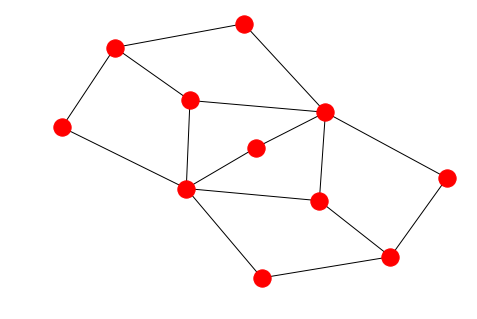

In [6]:
G = create_graph_P2(x1=1, x2=3, x3=1, x4=2, y1=2, y2=6, y3=5, y4=4, z1=3, z2=9, z3=5, z4=6, r1=True, b1=False, b2=False, b3=False, b4=False, l1=4, l2=4, l3=4, l4=5)
draw_graph(transform_P2(G))

In [30]:
TEST_CASES = [
    # x1,x2,x3,x4,y1,y2,y3,y4,z1,z2,z3,z4,r1,    b1,    b2,    b3,    b4,    l1,l2,l3,l4
    ((1, 3, 1, 2, 2, 6, 5, 4, 3, 9, 5, 7, True,  False, False, False, False, 4, 4, 4, 5), True),
    ((9, 3, 8, 2, 2, 9, 8, 4, 3, 9, 4, 6, True,  False, False, False, False, 9, 4, 4, 5), True),
    ((1, 5, 1, 8, 5, 6, 5, 4, 3, 5, 5, 6, True,  False, False, False, False, 9, 9, 4, 5), True),
    ((1, 5, 1, 8, 5, 6, 5, 4, 3, 5, 9, 6, False, False, False, False, False, 9, 9, 4, 5), False),
    ((1, 5, 1, 8, 5, 6, 5, 4, 3, 5, 5, 4, False, False, False, False, False, 9, 9, 4, 5), False),
    ((1, 1, 0, 1, 2, 6, 3, 4, 3, 8, 7, 6, False, True,  False, False, False, 9, 9, 4, 5), False),
    ((1, 6, 1, 8, 5, 6, 5, 0, 3, 5, 5, 9, True,  True,  True,  False, False, 1, 9, 4, 5), False),
]


def test_check_type_p2():
    for test_case, expected_result in TEST_CASES:
        g = create_graph_P2(*test_case)
        assert check_type_P2(g) == expected_result, f"Error in: {test_case}"
    return "[P2-check_type_P2] All checks passed ヾ(⌐■_■)ノ♪"
    
test_check_type_p2()

In [31]:
TEST_CASES = [
    #x1,x2,x3,x4,y1,y2,y3,y4,z1,z2,z3,z4,r1,    b1,    b2,    b3,    b4,    l1,l2,l3,l4
    (1, 3, 1, 2, 2, 6, 5, 4, 3, 9, 5, 7, True,  False, False, False, False, 4, 4, 4, 5),
    (9, 3, 8, 2, 2, 9, 8, 4, 3, 9, 4, 6, True,  False, False, False, False, 9, 4, 4, 5), 
    (1, 5, 1, 8, 5, 6, 5, 4, 3, 5, 5, 6, True,  False, False, False, False, 9, 9, 4, 5),
]

def test_transform_p2():
    for test_case in TEST_CASES:
        l1 = test_case[17]
        b1 = test_case[13]
        g = transform_P2(create_graph_P2(*test_case))
        
        assert g.nodes["e4"]['l'] == l1 / 2
        assert g.nodes["e4"]['b'] == b1
        assert g.nodes["e5"]['l'] == l1 / 2
        assert g.nodes["e5"]['l'] == l1 / 2
        assert g.nodes["v4"]['x'] == (g.nodes["v1"]['x'] + g.nodes["v2"]['x']) / 2
        assert g.nodes["v4"]['y'] == (g.nodes["v1"]['y'] + g.nodes["v2"]['y']) / 2
        assert g.nodes["v4"]['z'] == (g.nodes["v1"]['z'] + g.nodes["v2"]['z']) / 2
        assert g.nodes["e6"]['l'] == math.sqrt(math.pow(g.nodes["v3"]['x'] - g.nodes["v4"]['x'], 2) + math.pow(g.nodes["v3"]['y'] - g.nodes["v4"]['y'], 2) + math.pow(g.nodes["v3"]['z'] - g.nodes["v4"]['z'], 2))
        assert not g.nodes["e6"]['b']
        assert not g.nodes["i2"]['r']
        assert not g.nodes["i3"]['r']
    return "[P2-transform_P2] All checks passed ヾ(⌐■_■)ノ♪"
    
test_transform_p2()

In [32]:
def create_graph_P3(x1, x2, x3, x4, y1, y2, y3, y4, z1, z2, z3, z4, r1, b1, b2, b3, b4, l1, l2, l3, l4):
    G = nx.Graph()
    G.add_node('v1', type='v', x=x1, y=y1, z=z1)
    G.add_node('v2', type='v', x=x2, y=y2, z=z2)
    G.add_node('v3', type='v', x=x3, y=y3, z=z3)
    G.add_node('v4', type='v', x=x4, y=y4, z=z4)
    G.add_node('e1', type='e', b=b1, l=l1)
    G.add_node('e2', type='e', b=b2, l=l2)
    G.add_node('e3', type='e', b=b3, l=l3)
    G.add_node('e4', type='e', b=b4, l=l4)
    G.add_node('i1', type='i', r=r1)

    G.add_edge('e1', 'v1')
    G.add_edge('e1', 'v4')
    G.add_edge('e2', 'v2')
    G.add_edge('e2', 'v4')
    G.add_edge('e3', 'v2')
    G.add_edge('e3', 'v3')
    G.add_edge('e4', 'v1')
    G.add_edge('e4', 'v3')
    G.add_edge('i1', 'v1')
    G.add_edge('i1', 'v2')
    G.add_edge('i1', 'v3')
    
    return G

In [12]:
def check_type_P3(G):
    l1 = G.nodes['e1']['l']
    l2 = G.nodes['e2']['l']
    l3 = G.nodes['e3']['l']
    l4 = G.nodes['e4']['l']
    
    return ((l1 + l2 >= l3) and (l1 + l2 >= l4))

In [11]:
def transform_P3(G):
    r2 = False
    r3 = False
    x4 = G.nodes['v3']['x']
    y4 = G.nodes['v3']['y']
    z4 = G.nodes['v3']['z']
    x2 = G.nodes['v4']['x']
    y2 = G.nodes['v4']['y']
    z2 = G.nodes['v4']['z']
    l5 = math.sqrt(math.pow(x2 - x4, 2) + math.pow(y2 - y4, 2) + math.pow(z2 - z4, 2))
    b5 = False
    G.remove_edge('i1', 'v1')
    G.remove_edge('i1', 'v2')
    G.remove_edge('i1', 'v3')
    G.remove_node('i1')
    G.add_node('i2', type='i', r=r2)
    G.add_node('i3', type='i', r=r3)
    G.add_node('e5', type='e', b=b5, l=l5)
    G.add_edge('v3', 'e5')
    G.add_edge('v4', 'e5')
    G.add_edge('v1', 'i2')
    G.add_edge('v3', 'i2')
    G.add_edge('v4', 'i2')
    G.add_edge('v2', 'i3')
    G.add_edge('v3', 'i3')
    G.add_edge('v4', 'i3')
    
    return G

In [15]:
G = create_graph_P3(x1=1, x2=3, x3=1, x4=2, y1=2, y2=6, y3=5, y4=4, z1=3, z2=9, z3=5, z4=6, r1=True, b1=False, b2=False, 
             b3=False, b4=False, l1=4, l2=4, l3=4, l4=5)
draw_graph(transform_P3(G))

In [10]:
def create_graph_P4(x1, x2, x3, x4, y1, y2, y3, y4, z1, z2, z3, z4, r1, b1, b2, b3, b4, l1, l2, l3, l4):
    G = nx.Graph()
    G.add_node('v1', type='v', x=x1, y=y1, z=z1)
    G.add_node('v4', type='v', x=x2, y=y2, z=z2)
    G.add_node('v2', type='v', x=x3, y=y3, z=z3)
    G.add_node('v3', type='v', x=x4, y=y4, z=z4)
    G.add_node('e1', type='e', b=b1, l=l1)
    G.add_node('e2', type='e', b=b2, l=l2)
    G.add_node('e3', type='e', b=b3, l=l3)
    G.add_node('e4', type='e', b=b4, l=l4)
    G.add_node('i1', type='i', r=r1)

    G.add_edge('e1', 'v1')
    G.add_edge('e1', 'v4')
    G.add_edge('e2', 'v2')
    G.add_edge('e2', 'v4')
    G.add_edge('e3', 'v2')
    G.add_edge('e3', 'v3')
    G.add_edge('e4', 'v1')
    G.add_edge('e4', 'v3')
    G.add_edge('i1', 'v1')
    G.add_edge('i1', 'v2')
    G.add_edge('i1', 'v3')
    return G

In [11]:
g = create_graph_P4(x1=1, x2=3, x3=1, x4=2, y1=2, y2=6, y3=5, y4=4, z1=3, z2=9, z3=5, z4=6, r1=True, b1=False, b2=False, 
             b3=False, b4=False, l1=4, l2=4, l3=4, l4=5)
draw_graph(g)

In [ ]:
def check_type_P4(G):
    l1 = G.nodes['e1']['l']
    l2 = G.nodes['e2']['l']
    l3 = G.nodes['e3']['l']
    l4 = G.nodes['e4']['l']
    b4 = G.nodes['e4']['b']
    
    return b4 && (l4>(l1+l2))&&(l4>=l3)

In [13]:
def transform_P4(G):
    
    l4 = G.nodes['e4']['l']
    b4 = G.nodes['e4']['b']
    x1 = G.nodes['v1']['x']
    y1 = G.nodes['v1']['y']
    z1 = G.nodes['v1']['z']
    x4 = G.nodes['v3']['x']
    y4 = G.nodes['v3']['y']
    z4 = G.nodes['v3']['z']
    x3 = G.nodes['v2']['x']
    y3 = G.nodes['v2']['y']
    z3 = G.nodes['v2']['z']
    
    l5 = l4/2
    b5 = b4
    l6 = l4/2
    b6 = b4
    x5 = (x1+x4)/2
    y5 = (y1+y4)/2
    z5 = (z1+z4)/2
    l7 = math.sqrt(math.pow(x3-x5, 2)+math.pow(y3-y5, 2)+math.pow(z3-z5, 2))
    b7 = False
    r2 = False
    r3 = False
    
    
    G.remove_edge('i1', 'v1')
    G.remove_edge('i1', 'v2')
    G.remove_edge('i1', 'v3')
    G.remove_node('i1')
    
    g.add_node('v5', type='v', x=x5, y=y5, z=z5)
    g.add_node('e5', type='e', b=b5, l=l5)
    g.add_node('e6', type='e', b=b6, l=l6)
    g.add_node('e7', type='e', b=b7, l=l7)
    
    g.add_edge('e6', 'v1')
    g.add_edge('e6', 'v5')
    g.add_edge('e5', 'v3')
    g.add_edge('e5', 'v5')
    g.add_edge('e7', 'v2')
    g.add_edge('e7', 'v5')
    
    G.add_node('i2', type='i', r=r2)
    G.add_node('i3', type='i', r=r3)
    
    G.add_edge('i2', 'v5')
    G.add_edge('i2', 'v2')
    G.add_edge('i2', 'v3')
    
    G.add_edge('i3', 'v5')
    G.add_edge('i3', 'v1')
    G.add_edge('i3', 'v2')
    return G

In [14]:
g = create_graph_P4(x1=1, x2=3, x3=1, x4=2, y1=2, y2=6, y3=5, y4=4, z1=3, z2=9, z3=5, z4=6, r1=True, b1=False, b2=False, 
             b3=False, b4=False, l1=4, l2=4, l3=4, l4=5)
draw_graph(transform_P4(g))

In [15]:
def create_graph_P5(x1, x2, x3, x4, y1, y2, y3, y4, z1, z2, z3, z4, r1, b1, b2, b3, b4, l1, l2, l3, l4):
    
    return G

In [16]:
def transform_P5(G):
    
    return G

In [ ]:
class TestP5(unittest.TestCase):
    def test_check_type_1(self):
        b3 = False
        b4 = False
        l4 = 8
        l3 = 8
        l1 = 1
        l2 = 1
        G = create_graph_P5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=b3, b4=b4, l1=l1, l2=l2, l3=l3, l4=l4)
        self.assertTrue(check_type_P5(G))
    
    def test_check_type_2(self):
        b3 = True
        b4 = False
        l4 = 8
        l3 = 8
        l1 = 1
        l2 = 1
        G = create_graph_P5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=b3, b4=b4, l1=l1, l2=l2, l3=l3, l4=l4)
        self.assertFalse(check_type_P5(G))
        
    def test_check_type_3(self):
        b3 = False
        b4 = False
        l4 = 7
        l3 = 8
        l1 = 1
        l2 = 1
        G = create_graph_P5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=b3, b4=b4, l1=l1, l2=l2, l3=l3, l4=l4)
        self.assertFalse(check_type_P5(G))
        
    def test_check_type_4(self):
        b3 = False
        b4 = False
        l4 = 8
        l3 = 8
        l1 = 5
        l2 = 5
        G = create_graph_P5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=b3, b4=b4, l1=l1, l2=l2, l3=l3, l4=l4)
        self.assertFalse(check_type_P5(G))
        
    def test_check_type_5(self):
        b3 = False
        b4 = False
        l4 = 8
        l3 = 8
        l1 = 5
        l2 = 3
        G = create_graph_P5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=b3, b4=b4, l1=l1, l2=l2, l3=l3, l4=l4)
        self.assertFalse(check_type_P5(G))
        
    def test_check_type_6(self):
        b3 = True
        b4 = False
        l4 = 8
        l3 = 8
        l1 = 5
        l2 = 5
        G = create_graph_P5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=b3, b4=b4, l1=l1, l2=l2, l3=l3, l4=l4)
        self.assertFalse(check_type_P5(G))
       
    def test_calculations(self):
        b3 = False
        b4 = False
        l4 = 8
        l3 = 8
        l1 = 1
        l2 = 1
        G = create_graph_P5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=b3, b4=b4, l1=l1, l2=l2, l3=l3, l4=l4)
        G = transform_P5(G)
        self.assertEqual(G.nodes['e5']['b'], G.nodes['e4']['b'])
        self.assertEqual(G.nodes['e6']['b'], G.nodes['e4']['b'])
        self.assertEqual(G.nodes['e5']['l'], G.nodes['e4']['l']/2)
        self.assertEqual(G.nodes['e6']['l'], G.nodes['e4']['l']/2)
        self.assertEqual(G.nodes['v5']['x'], (G.nodes['v1']['x'] + G.nodes['v4']['x'])/2)
        self.assertEqual(G.nodes['v5']['y'], (G.nodes['v1']['y'] + G.nodes['v4']['y'])/2)
        self.assertEqual(G.nodes['v5']['z'], (G.nodes['v1']['z'] + G.nodes['v4']['z'])/2)
        self.assertFalse(G.nodes['v4']['b'])
        self.assertFalse(G.nodes['i2']['r'])
        self.assertFalse(G.nodes['i3']['r'])
        self.assertEqual(G.nodes['e7']['l'], math.sqrt(math.pow(G.nodes['v3']['x'] - G.nodes['v5']['x'], 2) + math.pow(G.nodes['v3']['y'] - G.nodes['v5']['y'], 2) + math.pow(G.nodes['v3']['z'] - G.nodes['v5']['z'], 2)))
       
unittest.main(argv=[''], verbosity=2, exit=False)

In [17]:
def create_graph_P6(x1, x2, x3, x4, y1, y2, y3, y4, z1, z2, z3, z4, r1, b1, b2, b3, b4, l1, l2, l3, l4):
    
    return G

In [18]:
def transform_P6(G):
    
    return G

In [19]:
def create_graph_P7(x1, x2, x3, x4, y1, y2, y3, y4, z1, z2, z3, z4, r1, b1, b2, b3, b4, l1, l2, l3, l4):

    return G

In [20]:
def transform_P7(G):
    
    return G

In [21]:
def create_graph_P8(x1, x2, x3, x4, y1, y2, y3, y4, z1, z2, z3, z4, r1, b1, b2, b3, b4, l1, l2, l3, l4):
    
    return G

In [22]:
def transform_P8(G):
    
    return G

In [23]:
def create_graph_P9(x1, x2, x3, x4, y1, y2, y3, y4, z1, z2, z3, z4, r1, b1, b2, b3, b4, l1, l2, l3, l4):
    
    return G

In [24]:
def transform_P9(G):
    
    return G